# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [75]:
# you are free to use any package you deem fit
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.model_selection import GridSearchCV

## Dataset

In [76]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

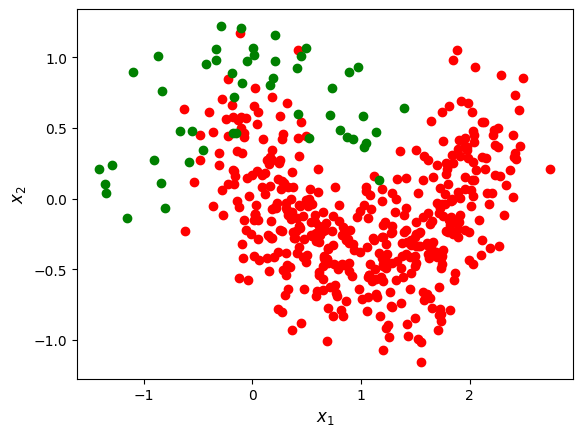

In [77]:
#visualizing data to explore dataset
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "ro")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "go")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)

# Displaying the plot.
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42)

In [79]:
model = svm.SVC(kernel="poly")

model.fit(X_train, Y_train)

SVC(kernel='poly')

## Testing / Optimization

In [80]:
#evaluating initial model
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.94      0.99      0.96       135

    accuracy                           0.93       150
   macro avg       0.86      0.73      0.77       150
weighted avg       0.93      0.93      0.93       150



The model is not great for class 0. Modifying the model:

In [81]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.914 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.914 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.886 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.97      0.99      0.98       135

    accuracy                           0.97       150
   macro avg       0.94      0.86      0.90       150
weighted avg       0.97      0.97      0.96       150



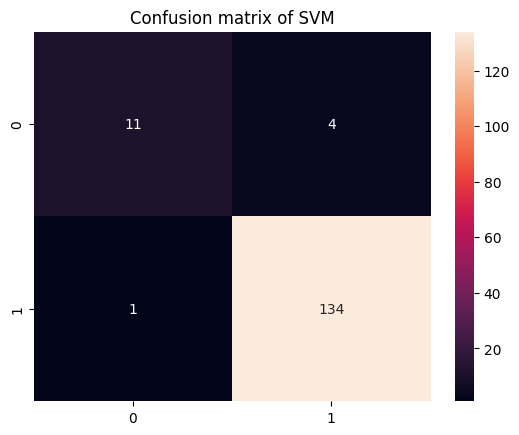

In [82]:
model = svm.SVC(C=1000,gamma=0.1,kernel="rbf")

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
cm = confusion_matrix(Y_test,predictions)
sb.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')

print(classification_report(Y_test, predictions))

## Performance Analysis

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.97      0.99      0.98       315

    accuracy                           0.97       350
   macro avg       0.94      0.88      0.91       350
weighted avg       0.97      0.97      0.97       350



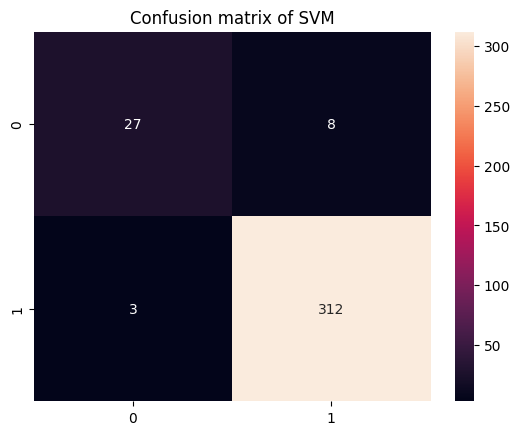

In [83]:
Y_pred_train = model.predict(X_train)

cm = confusion_matrix(Y_train,Y_pred_train)
sb.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')

print(classification_report(Y_train,Y_pred_train))

The points of class 1 were almost all correctly classfied by the model with 99% recall. The points of class 0 had a much lower recall as compared to class 1 which makes sense as the model was trained with much less class 0 data as compared to class 1. Class 0 has high precision as well, although less than class 1. However the model might overfit the class 1 data as there is very high precision and recall when using the train data (for class 1) as well as shown above. 